
Running Decision Tree...
Decision Tree Accuracy: 0.8447257383966245

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       592
           1       0.85      0.84      0.84       593

    accuracy                           0.84      1185
   macro avg       0.84      0.84      0.84      1185
weighted avg       0.84      0.84      0.84      1185



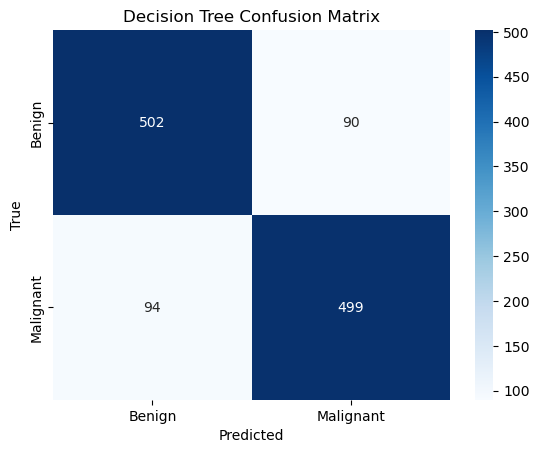

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load images and labels from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((128, 64))  # Resize to a fixed size
            img_array = np.array(img).flatten()  # Flatten the image
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images from both folders
benign_folder_path = 'Benign'  # Replace with your Benign folder path
malignant_folder_path = 'Malignant'  # Replace with your Malignant folder path

benign_images, benign_labels = load_images_from_folder(benign_folder_path, 0)  # Label 0 for Benign
malignant_images, malignant_labels = load_images_from_folder(malignant_folder_path, 1)  # Label 1 for Malignant

# Combine the data
X = np.array(benign_images + malignant_images)
y = np.array(benign_labels + malignant_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Decision Tree
def run_decision_tree(X_train, X_test, y_train, y_test):
    print("\nRunning Decision Tree...")
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision Tree Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title("Decision Tree Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run the Decision Tree Model
run_decision_tree(X_train, X_test, y_train, y_test)
